# <font color='blue'>Credit Risk Analysis</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.pylabtools import figsize

In [2]:
data = pd.read_csv('credit_dataset.csv')

In [3]:
data.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
credit.rating                     1000 non-null int64
account.balance                   1000 non-null int64
credit.duration.months            1000 non-null int64
previous.credit.payment.status    1000 non-null int64
credit.purpose                    1000 non-null int64
credit.amount                     1000 non-null int64
savings                           1000 non-null int64
employment.duration               1000 non-null int64
installment.rate                  1000 non-null int64
marital.status                    1000 non-null int64
guarantor                         1000 non-null int64
residence.duration                1000 non-null int64
current.assets                    1000 non-null int64
age                               1000 non-null int64
other.credits                     1000 non-null int64
apartment.type                    1000 non-null int64
bank.credits                  

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.rating,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
account.balance,1000.0,2.183,0.835589,1.0,1.0,2.0,3.00,3.0
credit.duration.months,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
previous.credit.payment.status,1000.0,2.292,0.620581,1.0,2.0,2.0,3.00,3.0
credit.purpose,1000.0,2.965,0.971967,1.0,2.0,3.0,4.00,4.0
credit.amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,1.874,1.196476,1.0,1.0,1.0,3.00,4.0
employment.duration,1000.0,2.446,1.105580,1.0,2.0,2.0,4.00,4.0
installment.rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
marital.status,1000.0,2.372,1.067125,1.0,1.0,3.0,3.00,4.0


In [6]:
data.nunique()

credit.rating                       2
account.balance                     3
credit.duration.months             33
previous.credit.payment.status      3
credit.purpose                      4
credit.amount                     923
savings                             4
employment.duration                 4
installment.rate                    4
marital.status                      3
guarantor                           2
residence.duration                  4
current.assets                      4
age                                53
other.credits                       2
apartment.type                      3
bank.credits                        2
occupation                          4
dependents                          2
telephone                           2
foreign.worker                      2
dtype: int64

Class 0: 300 (30.0%)
Class 1: 700 (70.0%)


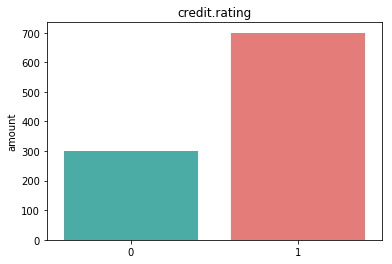

In [7]:
# Function to check the output variable
def check_output(dataset, output):
    amount = dataset[output].value_counts()
    ratio =  dataset[output].value_counts(normalize = True)*100
    print('Class 0: {} ({}%)'.format(amount[0], round(ratio[0],2)))
    print('Class 1: {} ({}%)'.format(amount[1], round(ratio[1],2)))

    labels = ['1' if label == 1 else '0' for label in dataset[output]]
    palette = {'1': '#f56b69', '0': '#3bbbb3'}

    ax = sns.countplot(labels, palette=palette)
    plt.title(output)
    plt.ylabel('amount')
    return plt.show()

check_output(data, 'credit.rating')

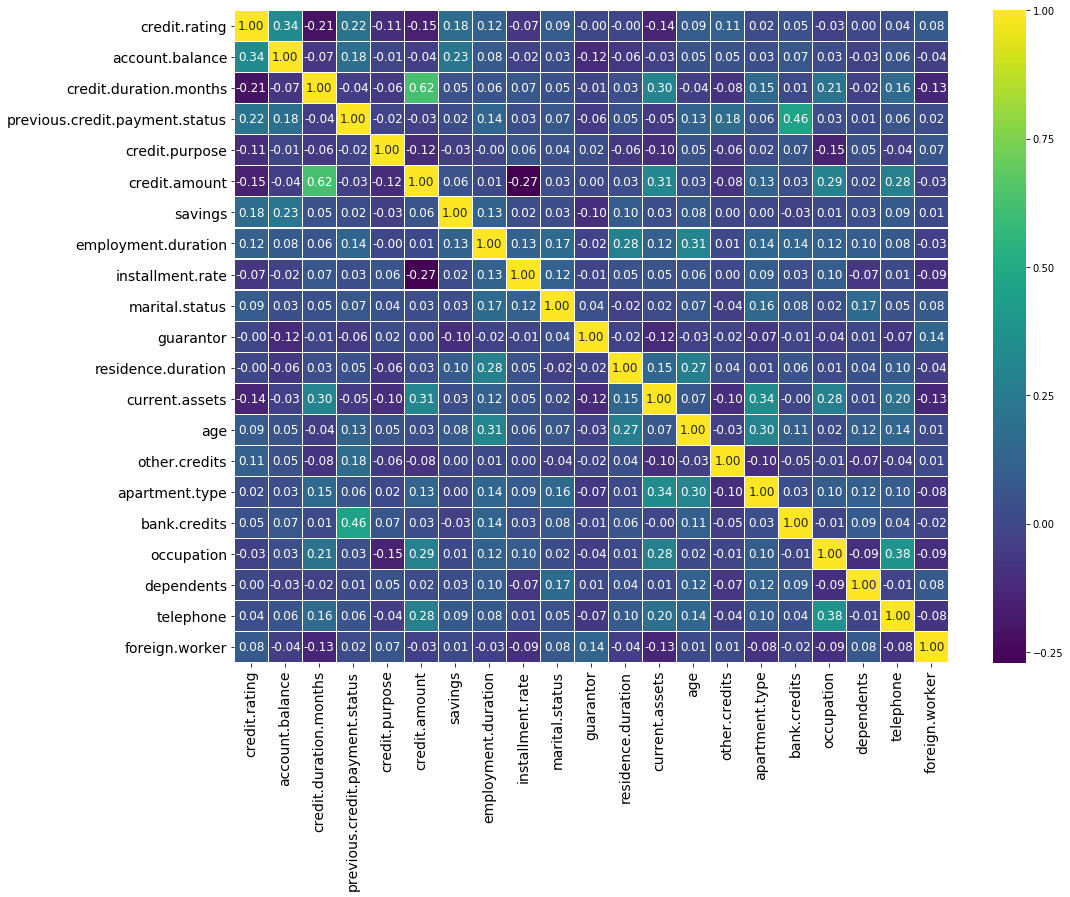

In [8]:
# Calculates the correlation and plot the data in s heatmap
sns.heatmap(data.corr(), annot = True, cmap = 'viridis', linewidths = 0.2, annot_kws = {'size':12}, fmt = '.2f')
fig = plt.gcf()
fig.set_size_inches(16,12)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [9]:
def check_missing(dataset, display = 5):
    temp_df = dataset.copy()
    df_nan = (temp_df.isnull().sum() / len(temp_df)) * 100
    missing_data = pd.DataFrame({'Missing n': temp_df.isnull().sum(),'% Missing' :df_nan})
    if missing_data['Missing n'].sum() == 0:
        return print('Great! There are no missing values in this dataset.')
    else:
        return missing_data.sort_values('% Missing', ascending = False).head(display)
    
check_missing(data)

Great! There are no missing values in this dataset.


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, Normalizer

select = ['credit.amount', 'credit.duration.months', 'age']
    
scaler_x = StandardScaler()
normal_x = Normalizer()

scaler_y = StandardScaler()
normal_y = Normalizer()

df_normalized = pd.DataFrame(scaler_x.fit_transform(data[select]))
df_transformed = pd.DataFrame(normal_x.fit_transform(df_normalized))
df_transformed.columns = select
data[select] = df_transformed

/Users/Daniela/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Daniela/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
le = LabelEncoder()
select = [c for c in data.columns if c not in ['credit.amount', 'credit.duration.months', 'age']]
for col in select:
    data[col] = le.fit_transform(data[col])

In [12]:
features = [c for c in data.columns if c not in ['credit.rating']]#, 'bank.credits','guarantor','other.credits','dependents','foreign.worker','telephone','residence.duration','occupation','marital.status','installment.rate']]

# Model 1

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[features], data['credit.rating'], test_size = 0.33, random_state = 42)
print(X_train.shape)

(670, 20)


In [14]:
# Keras e TensorFlow
from keras.models import Sequential
from keras.layers import Dense
from pandas_ml import ConfusionMatrix
from sklearn.metrics import average_precision_score, roc_auc_score

Using TensorFlow backend.


In [15]:
X1_train, X1_test, y1_train, y1_test = train_test_split(data[features], data['credit.rating'], test_size = 0.33, random_state = 42)

model1 = Sequential()
model1.add(Dense(20, input_dim = X1_train.shape[1], activation = 'relu')) 
model1.add(Dense(2**10, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              21504     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 22,949
Trainable params: 22,949
Non-trainable params: 0
_________________________________________________________________


In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as K

nb_epoch = 15
batch_size = 50

filepath = "weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1, mode = 'min')
callbacks_list = [checkpoint, early_stopping]

model1.fit(X1_train, y1_train,
          validation_split=0.1, batch_size=batch_size, epochs=nb_epoch, shuffle=True, callbacks=callbacks_list)

Train on 603 samples, validate on 67 samples
Epoch 1/15
603/603 [==============================] - 1s 2ms/step - loss: 0.6267 - acc: 0.6766 - val_loss: 0.5593 - val_acc: 0.7612

Epoch 00001: val_loss improved from inf to 0.55927, saving model to weights.best.hdf5
Epoch 2/15
603/603 [==============================] - 0s 58us/step - loss: 0.5848 - acc: 0.6932 - val_loss: 0.5730 - val_acc: 0.7910

Epoch 00002: val_loss did not improve from 0.55927
Epoch 3/15
603/603 [==============================] - 0s 161us/step - loss: 0.5570 - acc: 0.7330 - val_loss: 0.5558 - val_acc: 0.7761

Epoch 00003: val_loss improved from 0.55927 to 0.55578, saving model to weights.best.hdf5
Epoch 4/15
603/603 [==============================] - 0s 219us/step - loss: 0.5388 - acc: 0.7347 - val_loss: 0.5398 - val_acc: 0.7761

Epoch 00004: val_loss improved from 0.55578 to 0.53981, saving model to weights.best.hdf5
Epoch 5/15
603/603 [==============================] - 0s 249us/step - loss: 0.5118 - acc: 0.7546 - va

In [17]:
print("Loss: ", model1.evaluate(X1_test, y1_test, verbose = 0))

y1_predicted = np.round(model1.predict(X1_test)).T[0]
y1_correct = np.array(y1_test)

# Calculates precision-recall score and auc
average_precision1 = average_precision_score(y1_correct, y1_predicted)
roc_auc1 = roc_auc_score(y1_test, y1_predicted)

print('Average precision-recall score: {0:0.2f}'.format(average_precision1))
print('AUC: {0:0.2f}'.format(roc_auc1))

Loss:  [0.5127806575009317, 0.7575757579369978]
Average precision-recall score: 0.77
AUC: 0.64


Confusion matrix: 

Predicted  False  True  __all__
Actual                         
False         36    62       98
True          18   214      232
__all__       54   276      330


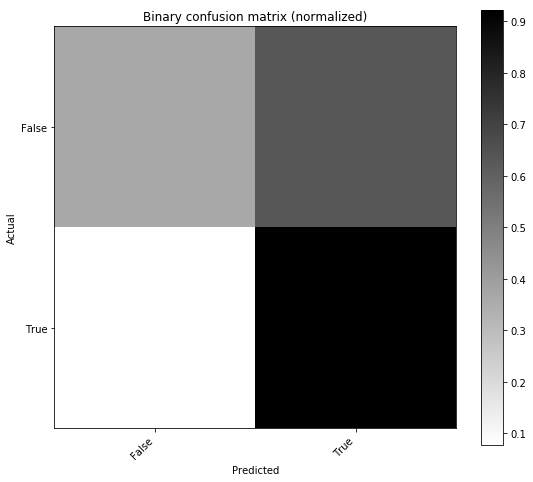

In [18]:
# Plotting a confusion matrix
confusion_matrix1 = ConfusionMatrix(y1_correct, y1_predicted)
print("Confusion matrix: \n\n{}"  .format(confusion_matrix1))
confusion_matrix1.plot(normalized = True)
plt.show()